## Цели работы:
Клиентам компании «Мегалайн» — федерального оператора сотовой связи, предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
    
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов:
- #### Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей
- #### Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей
    
### Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
    
### Описание данных:
- #### Таблица users (информация о пользователях):
    - user_id — уникальный идентификатор пользователя
    - first_name — имя пользователя
    - last_name — фамилия пользователя
    - age — возраст пользователя (годы)
    - reg_date — дата подключения тарифа (день, месяц, год)
    - churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    - city — город проживания пользователя
    - tariff — название тарифного плана
- #### Таблица calls (информация о звонках):
    - id — уникальный номер звонка
    - call_date — дата звонка
    - duration — длительность звонка в минутах
    - user_id — идентификатор пользователя, сделавшего звонок
- #### Таблица messages (информация о сообщениях):
    - id — уникальный номер сообщения
    - message_date — дата сообщения
    - user_id — идентификатор пользователя, отправившего сообщение
- #### Таблица internet (информация об интернет-сессиях):
    - id — уникальный номер сессии
    - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    - session_date — дата интернет-сессии
    - user_id — идентификатор пользователя
- #### Таблица tariffs (информация о тарифах):
    - tariff_name — название тарифа
    - rub_monthly_fee — ежемесячная абонентская плата в рублях
    - minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    - messages_included — количество сообщений в месяц, включённых в абонентскую плату
    - mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    - rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    - rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    - rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Загрузим необходимые библиотеки.

In [259]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats as st

Загрузим предоставляенные данные.

In [260]:
pth_calls = '\\Users\Home\Documents\Yandex\проект №4 Определение тарифа для компании\calls.csv' # Локальный путь
pth_users = '\\Users\Home\Documents\Yandex\проект №4 Определение тарифа для компании\\users.csv'
pth_tariffs = '\\Users\Home\Documents\Yandex\проект №4 Определение тарифа для компании\\tariffs.csv'
pth_messages = '\\Users\Home\Documents\Yandex\проект №4 Определение тарифа для компании\messages.csv'
pth_internet = '\\Users\Home\Documents\Yandex\проект №4 Определение тарифа для компании\internet.csv'

pth2_calls = '/datasets/calls.csv' # Серверный путь
pth2_users = '/datasets/users.csv'
pth2_tariffs = '/datasets/tariffs.csv'
pth2_messages = '/datasets/messages.csv'
pth2_internet = '/datasets/internet.csv'

if os.path.exists(pth_calls) and os.path.exists(pth_users) and os.path.exists(pth_tariffs) and os.path.exists(pth_messages) and os.path.exists(pth_internet):
    calls = pd.read_csv(pth_calls, sep=',')
    users = pd.read_csv(pth_users, sep=',')
    tariffs = pd.read_csv(pth_tariffs, sep=',')
    messages = pd.read_csv(pth_messages, sep=',')
    internet = pd.read_csv(pth_internet, sep=',')
elif os.path.exists(pth2_calls) and os.path.exists(pth2_users) and os.path.exists(pth2_tariffs) and os.path.exists(pth2_messages) and os.path.exists(pth2_internet):
    calls = pd.read_csv(pth2_calls, sep=',')
    users = pd.read_csv(pth2_users, sep=',')
    tariffs = pd.read_csv(pth2_tariffs, sep=',')
    messages = pd.read_csv(pth2_messages, sep=',')
    internet = pd.read_csv(pth2_internet, sep=',')

else:
    print('Something is wrong')

## Изучим таблицу calls.

In [261]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [262]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Т.к. по условиям задачи, «Мегалайн» всегда округляет секунды до минут. И каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Необходимо округлить все данные в колонке "duration" до большего целого числа и переведем значения в тип данных - целочисленный.

In [263]:
#calls['duration'] = np.ceil(calls['duration'])
#calls['duration'] = pd.to_numeric(calls['duration'], errors='coerce',downcast='integer')
calls['duration'] = np.ceil(calls['duration']).astype('int32')

In [264]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [265]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         202607 non-null  object
 1   call_date  202607 non-null  object
 2   duration   202607 non-null  int32 
 3   user_id    202607 non-null  int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 5.4+ MB


Переведем колонку call_date в во временной формат данных.

In [266]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [267]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.4+ MB


In [268]:
def check_dup_nan(dataframe):
    df = dataframe
    list_col = list(df.columns)
    print('Количество задублированных строк в дата сете:', df.duplicated().sum(), 'шт.')
    print('')
    summa = 0
    for col in list_col:
        print('Кол-во пропусков в столбеце:  ', col, '-', df[col].isna().sum(), 'шт.')
        summa += df[col].isna().sum()
    print('===================================================================')
    check_marker = df.duplicated().sum() + summa
    if check_marker == 0:
        print('Пропусков и дубликатов строк не обнаружено.')
    else:
        print('Ошибки в данных! Требуется обратить внимание.')

In [269]:
check_dup_nan(calls)

Количество задублированных строк в дата сете: 0 шт.

Кол-во пропусков в столбеце:   id - 0 шт.
Кол-во пропусков в столбеце:   call_date - 0 шт.
Кол-во пропусков в столбеце:   duration - 0 шт.
Кол-во пропусков в столбеце:   user_id - 0 шт.
Пропусков и дубликатов строк не обнаружено.


Теперь все данные представлены в верных форматах.

## Изучим таблицу users.

In [270]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [271]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Переведем колонки "churn_date" и "reg_date" call_date в во временной формат данных.

In [272]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [273]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [274]:
check_dup_nan(users)

Количество задублированных строк в дата сете: 0 шт.

Кол-во пропусков в столбеце:   user_id - 0 шт.
Кол-во пропусков в столбеце:   age - 0 шт.
Кол-во пропусков в столбеце:   churn_date - 462 шт.
Кол-во пропусков в столбеце:   city - 0 шт.
Кол-во пропусков в столбеце:   first_name - 0 шт.
Кол-во пропусков в столбеце:   last_name - 0 шт.
Кол-во пропусков в столбеце:   reg_date - 0 шт.
Кол-во пропусков в столбеце:   tariff - 0 шт.
Ошибки в данных! Требуется обратить внимание.


Все данные представлены в верных форматах. Пропуски в колонке "churn_date" (дата прекращения пользования тарифом) говорят о том, что тариф ещё действовал на момент выгрузки данных.

## Изучим таблицу messages.

In [275]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [276]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Переведем колонку call_date в во временной формат данных.

In [277]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [278]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [279]:
check_dup_nan(messages)

Количество задублированных строк в дата сете: 0 шт.

Кол-во пропусков в столбеце:   id - 0 шт.
Кол-во пропусков в столбеце:   message_date - 0 шт.
Кол-во пропусков в столбеце:   user_id - 0 шт.
Пропусков и дубликатов строк не обнаружено.


Все данные представлены в верных форматах.

## Изучим таблицу internet.

In [280]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [281]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Замечания по колонке "Unnamed: 0" - она дублирует индексы строк. Удалим ее за ненадобностью.

In [282]:
internet = internet.drop(['Unnamed: 0'], axis=1)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Переведем колонку session_date в во временной формат данных.

In [283]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [284]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Т.к. тарификация происходит за Гб произведем замены в колонке mb_used. Заменим колонку "mb_used" на "gb_used" и разделим все значения на 1024 для перевода Мб в Гб.

In [285]:
#переименование столбцов
internet = internet.rename(columns = {'mb_used':'gb_used'})
internet['gb_used'] = internet['gb_used'] / 1024
internet.head()

,id,gb_used,session_date,user_id
0,1000_0,0.110303,2018-11-25,1000
1,1000_1,1.028135,2018-09-07,1000
2,1000_2,1.169199,2018-06-25,1000
3,1000_3,0.537373,2018-08-22,1000
4,1000_4,0.295469,2018-09-24,1000


In [286]:
check_dup_nan(internet)

Количество задублированных строк в дата сете: 0 шт.

Кол-во пропусков в столбеце:   id - 0 шт.
Кол-во пропусков в столбеце:   gb_used - 0 шт.
Кол-во пропусков в столбеце:   session_date - 0 шт.
Кол-во пропусков в столбеце:   user_id - 0 шт.
Пропусков и дубликатов строк не обнаружено.


In [287]:
def function(df):
    print ('------------- Краткая информация ------------')
    display(df.head())

## Изучим таблицу tariffs.

In [288]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [289]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Колонку "mb_per_month_included" переименуем в "gb_per_month_included" и заменим в ней данные на Гигабайты. Для перевода используем то, что 1Гб это 1024 Мб.

In [290]:
#переименование столбцов
tariffs = tariffs.rename(columns = {'mb_per_month_included':'gb_per_month_included'})
tariffs['gb_per_month_included'] = (tariffs['gb_per_month_included'] / 1024).astype('int32')

In [291]:
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


In [292]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   gb_per_month_included  2 non-null      int32 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int32(1), int64(6), object(1)
memory usage: 248.0+ bytes


In [293]:
#tariffs['gb_per_month_included'] = pd.to_numeric(tariffs['gb_per_month_included'], errors='coerce',downcast='integer')

In [294]:
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


In [295]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   gb_per_month_included  2 non-null      int32 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int32(1), int64(6), object(1)
memory usage: 248.0+ bytes


In [296]:
check_dup_nan(tariffs)

Количество задублированных строк в дата сете: 0 шт.

Кол-во пропусков в столбеце:   messages_included - 0 шт.
Кол-во пропусков в столбеце:   gb_per_month_included - 0 шт.
Кол-во пропусков в столбеце:   minutes_included - 0 шт.
Кол-во пропусков в столбеце:   rub_monthly_fee - 0 шт.
Кол-во пропусков в столбеце:   rub_per_gb - 0 шт.
Кол-во пропусков в столбеце:   rub_per_message - 0 шт.
Кол-во пропусков в столбеце:   rub_per_minute - 0 шт.
Кол-во пропусков в столбеце:   tariff_name - 0 шт.
Пропусков и дубликатов строк не обнаружено.


## Подсчет заданных характеристик для каждого пользователя

Необходимо добавить в таблицs calls, messages, internet столбец month.

In [297]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [298]:
calls['month'] = calls['call_date'].astype('datetime64[M]')
messages['month'] = messages['message_date'].astype('datetime64[M]')
internet['month'] = internet['session_date'].astype('datetime64[M]')

In [299]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,2018-07-01
1,1000_1,2018-08-17,0,1000,2018-08-01
2,1000_2,2018-06-11,3,1000,2018-06-01
3,1000_3,2018-09-21,14,1000,2018-09-01
4,1000_4,2018-12-15,6,1000,2018-12-01


In [300]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


In [301]:
internet.head()

,id,gb_used,session_date,user_id,month
0,1000_0,0.110303,2018-11-25,1000,2018-11-01
1,1000_1,1.028135,2018-09-07,1000,2018-09-01
2,1000_2,1.169199,2018-06-25,1000,2018-06-01
3,1000_3,0.537373,2018-08-22,1000,2018-08-01
4,1000_4,0.295469,2018-09-24,1000,2018-09-01


## Подсчитаем количественные характеристики общения для каждого пользователя по месяцам.

In [302]:
calls_sum = calls.pivot_table(values='duration', index=['user_id', 'month'], aggfunc=['count', 'sum'])
messages_sum = messages.pivot_table(values='id', index=['user_id', 'month'], aggfunc=['count'])
internet_sum = internet.pivot_table(values='gb_used', index=['user_id', 'month'], aggfunc=['sum']).reset_index()
#internet_sum.reset_index(inplace=True)
calls_sum.reset_index(inplace=True)
messages_sum.reset_index(inplace=True)


In [303]:
internet_sum.head()

,user_id,month,sum
,,,gb_used
0,1000,2018-05-01,2.200674
1,1000,2018-06-01,22.689229
2,1000,2018-07-01,13.675430
3,1000,2018-08-01,13.726494
4,1000,2018-09-01,14.227451


Т.к. по условиям задачи, для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Необходимо округлить все данные в колонке "sum / gb_used" до большего целого числа и переведем значения в тип данных - целочисленный.

In [304]:
internet_sum['sum', 'gb_used'] = np.ceil(internet_sum['sum', 'gb_used']).astype('int32')
internet_sum.head()

,user_id,month,sum
,,,gb_used
0,1000,2018-05-01,3
1,1000,2018-06-01,23
2,1000,2018-07-01,14
3,1000,2018-08-01,14
4,1000,2018-09-01,15


In [305]:
calls_sum.head()

,user_id,month,count,sum
,,,duration,duration
0,1000,2018-05-01,22,159
1,1000,2018-06-01,43,172
2,1000,2018-07-01,47,340
3,1000,2018-08-01,52,408
4,1000,2018-09-01,58,466


In [306]:
messages_sum.head()

,user_id,month,count
,,,id
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57


## Определим месячную выручку.
### Посчитаем прибыль по месячно за превышение минут разговоров.
    С каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [307]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [308]:
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


### Добавим колонки tariff и over_min_payment_rub - тариф и переплата за минуты сверх лимита соответственно.

### Для дальнейшей работы с таблицами необходимо избавится от мультииндекса. Пересоберем дата сеты.

## 1. internet

In [309]:
internet_sum.head()

,user_id,month,sum
,,,gb_used
0,1000,2018-05-01,3
1,1000,2018-06-01,23
2,1000,2018-07-01,14
3,1000,2018-08-01,14
4,1000,2018-09-01,15


In [310]:
#internet_sum = internet_sum.rename(columns={('sum','gb_used'):'gb_used'}, errors="raise")
#internet_sum.head()

In [311]:
#internet_sum.columns = ['user_id', 'month', 'gb_used']
#internet_sum

In [312]:
df = internet_sum

column_name_1 = 'user_id'
column_name_2 = 'month'
column_name_3 = ('sum', 'gb_used')

# create the dictionary of lists
d = {column_name_1:df[column_name_1], column_name_2:df[column_name_2] ,'gb_used':df[column_name_3]}

internet_temp = pd.DataFrame(d)
internet_temp.head()

,user_id,month,gb_used
0,1000,2018-05-01,3
1,1000,2018-06-01,23
2,1000,2018-07-01,14
3,1000,2018-08-01,14
4,1000,2018-09-01,15


In [313]:
internet_temp['user_id'].nunique()

497

## 2. calls

In [314]:
calls_sum.head()

,user_id,month,count,sum
,,,duration,duration
0,1000,2018-05-01,22,159
1,1000,2018-06-01,43,172
2,1000,2018-07-01,47,340
3,1000,2018-08-01,52,408
4,1000,2018-09-01,58,466


In [315]:
df = calls_sum

column_name_1 = 'user_id'
column_name_2 = 'month'
column_name_3 = ('count', 'duration')
column_name_4 = ('sum', 'duration')

# create the dictionary of lists
d = {column_name_1:df[column_name_1], column_name_2:df[column_name_2], 
     'number_of_calls':df[column_name_3], 'total_minutes':df[column_name_4]}

calls_temp = pd.DataFrame(d)
calls_temp.head()

,user_id,month,number_of_calls,total_minutes
0,1000,2018-05-01,22,159
1,1000,2018-06-01,43,172
2,1000,2018-07-01,47,340
3,1000,2018-08-01,52,408
4,1000,2018-09-01,58,466


In [316]:
calls_temp['user_id'].nunique()

492

## 3. messages

In [317]:
messages_sum.head()

,user_id,month,count
,,,id
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57


In [318]:
df = messages_sum

column_name_1 = 'user_id'
column_name_2 = 'month'
column_name_3 = ('count', 'id')

# create the dictionary of lists
d = {column_name_1:df[column_name_1], column_name_2:df[column_name_2], 
     'number_of_sms':df[column_name_3]}

messages_temp = pd.DataFrame(d)
messages_temp.head()

,user_id,month,number_of_sms
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57


In [319]:
print('messages_temp:',messages_temp['user_id'].nunique())
print('internet_temp:',internet_temp['user_id'].nunique())
print('calls_temp:',calls_temp['user_id'].nunique())

messages_temp: 426
internet_temp: 497
calls_temp: 492


# Объединим таблицы

## df_test_1 = internet_temp.merge(messages_temp, on=['user_id', 'month'], how='outer')


In [320]:
df_test_1 = internet_temp.merge(messages_temp, on=['user_id', 'month'], how='outer')
result_table_1 = df_test_1.merge(calls_temp, on=['user_id', 'month'], how='outer')
result_table_1.head()

,user_id,month,gb_used,number_of_sms,number_of_calls,total_minutes
0,1000,2018-05-01,3.0,22.0,22.0,159.0
1,1000,2018-06-01,23.0,60.0,43.0,172.0
2,1000,2018-07-01,14.0,75.0,47.0,340.0
3,1000,2018-08-01,14.0,81.0,52.0,408.0
4,1000,2018-09-01,15.0,57.0,58.0,466.0


In [321]:
result_table_1['user_id'].nunique()

498

In [322]:
df_test_2 = users[['user_id', 'city', 'tariff']]
df_test_2.head()

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


In [323]:
df_test_2.shape

(500, 3)

In [324]:
result_table_2 = df_test_2.merge(result_table_1, on='user_id', how='left')
#result_table_2['gb_used'] = result_table_2['gb_used'][result_table_2['gb_used'].isna() == False].astype('int32')
result_table_2[['gb_used', 'number_of_sms', 'number_of_calls', 'total_minutes']] = result_table_2[['gb_used', 'number_of_sms', 'number_of_calls', 'total_minutes']].fillna(0)
result_table_3 = result_table_2.reset_index()
result_table_3.head()

,index,user_id,city,tariff,month,gb_used,number_of_sms,number_of_calls,total_minutes
0,0,1000,Краснодар,ultra,2018-05-01,3.0,22.0,22.0,159.0
1,1,1000,Краснодар,ultra,2018-06-01,23.0,60.0,43.0,172.0
2,2,1000,Краснодар,ultra,2018-07-01,14.0,75.0,47.0,340.0
3,3,1000,Краснодар,ultra,2018-08-01,14.0,81.0,52.0,408.0
4,4,1000,Краснодар,ultra,2018-09-01,15.0,57.0,58.0,466.0


In [325]:
result_table_3['user_id'].nunique()

500

In [326]:
#def payment_def(x):
#    if x.loc['tariff'] == 'smart':
#        
#        max_gb = 15
#        max_sms = 50
#        max_minutes = 500
#        tariff_gb = 200
#        tariff_sms = 3
#        tariff_minutes = 3
#        monthlypay = 550
#        
#        if x.loc['gb_used'] > max_gb:
#            pay_gb = (x.loc['gb_used'] - max_gb) * tariff_gb
#        else:
#            pay_gb = 0
#        if x.loc['number_of_sms'] > max_sms:
#            pay_sms = (x.loc['number_of_sms'] - max_sms) * tariff_sms
#        else:
#            pay_sms = 0
#        if x.loc['total_minutes'] > max_minutes:
#            pay_min = (x.loc['total_minutes'] - max_minutes) * tariff_minutes
#        else:
#            pay_min = 0
#            
#        total_pay = pay_gb + pay_sms + pay_min + monthlypay
#        
#        return total_pay
#    
#    if x.loc['tariff'] == 'ultra':
#        
#        max_gb = 30
#        max_sms = 1000
#        max_minutes = 3000
#        tariff_gb = 150
#        tariff_sms = 1
#        tariff_minutes = 1
#        monthlypay = 1950
#        
#        if x.loc['gb_used'] > max_gb:
#            pay_gb = (x.loc['gb_used'] - max_gb) * tariff_gb
#        else:
#            pay_gb = 0
#        if x.loc['number_obf_sms'] > max_sms:
#            pay_sms = (x.loc['number_of_sms'] - max_sms) * tariff_sms
#        else:
#            pay_sms = 0
#        if x.loc['total_minutes'] > max_minutes:
#            pay_min = (x.loc['total_minutes'] - max_minutes) * tariff_minutes
#        else:
#            pay_min = 0            
#        total_pay = pay_gb + pay_sms + pay_min + monthlypay
#       
#        return total_pay

In [327]:
def super_func(df, column, new_column):

    def def_extra(x):

        if x.loc['tariff'] == 'smart':
            if column == 'gb_used':
                limit = 15
            elif column == 'number_of_sms':
                limit = 50
            else:
                limit = 500
            
            if x.loc[column] > limit:
                extra = x.loc[column] - limit
                return extra
            return 0

        if x.loc['tariff'] == 'ultra':
            if column == 'gb_used':
                limit = 30
            elif column == 'number_of_sms':
                limit = 1000
            else:
                limit = 3000
            
            if x.loc[column] > limit:
                extra = x.loc[column] - limit
                return extra
            return 0

    list_pay = df.apply(def_extra, axis=1)
    result_table_3[new_column] = list_pay

In [328]:
super_func(result_table_3, 'gb_used', 'extra_gb')
super_func(result_table_3, 'number_of_sms', 'extra_sms')
super_func(result_table_3, 'total_minutes', 'extra_minutes')

result_table_3.head()

,index,user_id,city,tariff,month,gb_used,number_of_sms,number_of_calls,total_minutes,extra_gb,extra_sms,extra_minutes
0,0,1000,Краснодар,ultra,2018-05-01,3.0,22.0,22.0,159.0,0.0,0.0,0.0
1,1,1000,Краснодар,ultra,2018-06-01,23.0,60.0,43.0,172.0,0.0,0.0,0.0
2,2,1000,Краснодар,ultra,2018-07-01,14.0,75.0,47.0,340.0,0.0,0.0,0.0
3,3,1000,Краснодар,ultra,2018-08-01,14.0,81.0,52.0,408.0,0.0,0.0,0.0
4,4,1000,Краснодар,ultra,2018-09-01,15.0,57.0,58.0,466.0,0.0,0.0,0.0


In [329]:
result_table_3.shape

(3216, 12)

In [330]:
def super_func_2(df, column, new_column):

    def def_extra(x):

        if x.loc['tariff'] == 'smart':
            if column == 'extra_gb':
                limit = 200
            elif column == 'extra_sms':
                limit = 3
            else:
                limit = 3
            
            extra = x.loc[column] * limit
            return extra
            
        if x.loc['tariff'] == 'ultra':
            if column == 'extra_gb':
                limit = 150
            elif column == 'extra_sms':
                limit = 1
            else:
                limit = 1
            
            extra = x.loc[column] * limit
            return extra
        
    list_pay = df.apply(def_extra, axis=1)
    result_table_3[new_column] = list_pay

In [331]:
super_func_2(result_table_3, 'extra_gb', 'extra_gb_rub')
super_func_2(result_table_3, 'extra_sms', 'extra_sms_rub')
super_func_2(result_table_3, 'extra_minutes', 'extra_minutes_rub')

result_table_3['monthly_fee_rub'] = result_table_3['tariff']
result_table_3['monthly_fee_rub'].replace('ultra', 1950, inplace=True)
result_table_3['monthly_fee_rub'].replace('smart', 550, inplace=True)
result_table_3['total_rub'] = result_table_3['extra_gb_rub'] + result_table_3['extra_sms_rub'] + result_table_3['extra_minutes_rub'] + result_table_3['monthly_fee_rub']

In [332]:
result_table_3.head()

,index,user_id,city,tariff,month,gb_used,number_of_sms,number_of_calls,total_minutes,extra_gb,extra_sms,extra_minutes,extra_gb_rub,extra_sms_rub,extra_minutes_rub,monthly_fee_rub,total_rub
0,0,1000,Краснодар,ultra,2018-05-01,3.0,22.0,22.0,159.0,0.0,0.0,0.0,0.0,0.0,0.0,1950,1950.0
1,1,1000,Краснодар,ultra,2018-06-01,23.0,60.0,43.0,172.0,0.0,0.0,0.0,0.0,0.0,0.0,1950,1950.0
2,2,1000,Краснодар,ultra,2018-07-01,14.0,75.0,47.0,340.0,0.0,0.0,0.0,0.0,0.0,0.0,1950,1950.0
3,3,1000,Краснодар,ultra,2018-08-01,14.0,81.0,52.0,408.0,0.0,0.0,0.0,0.0,0.0,0.0,1950,1950.0
4,4,1000,Краснодар,ultra,2018-09-01,15.0,57.0,58.0,466.0,0.0,0.0,0.0,0.0,0.0,0.0,1950,1950.0


In [333]:
def integer_v(df):
    list_column = list(df.columns)
    for column in list_column:
        if df[column].dtype == 'float64':
            df[column] = df[column].astype('int64')

In [334]:
integer_v(result_table_3)
result_table = result_table_3
result_table.head()

,index,user_id,city,tariff,month,gb_used,number_of_sms,number_of_calls,total_minutes,extra_gb,extra_sms,extra_minutes,extra_gb_rub,extra_sms_rub,extra_minutes_rub,monthly_fee_rub,total_rub
0,0,1000,Краснодар,ultra,2018-05-01,3,22,22,159,0,0,0,0,0,0,1950,1950
1,1,1000,Краснодар,ultra,2018-06-01,23,60,43,172,0,0,0,0,0,0,1950,1950
2,2,1000,Краснодар,ultra,2018-07-01,14,75,47,340,0,0,0,0,0,0,1950,1950
3,3,1000,Краснодар,ultra,2018-08-01,14,81,52,408,0,0,0,0,0,0,1950,1950
4,4,1000,Краснодар,ultra,2018-09-01,15,57,58,466,0,0,0,0,0,0,1950,1950


In [335]:
result_table.shape

(3216, 17)

In [336]:
#def payment_def(x):
#    if x.loc['tariff'] == 'smart':
#        
#        max_gb = 15
#        max_sms = 50
#        max_minutes = 500
#        tariff_gb = 200
#        tariff_sms = 3
#        tariff_minutes = 3
#        monthlypay = 550
#        
#        if x.loc['gb_used'] > max_gb:
#            pay_gb = (x.loc['gb_used'] - max_gb) * tariff_gb
#        else:
#            pay_gb = 0
#        if x.loc['number_of_sms'] > max_sms:
#            pay_sms = (x.loc['number_of_sms'] - max_sms) * tariff_sms
#        else:
#            pay_sms = 0
#        if x.loc['total_minutes'] > max_minutes:
#            pay_min = (x.loc['total_minutes'] - max_minutes) * tariff_minutes
#        else:
#            pay_min = 0
#            
#        total_pay = pay_gb + pay_sms + pay_min + monthlypay
#        
#        return total_pay
#    
#    if x.loc['tariff'] == 'ultra':
#        
#        max_gb = 30
#        max_sms = 1000
#        max_minutes = 3000
#        tariff_gb = 150
#        tariff_sms = 1
#        tariff_minutes = 1
#        monthlypay = 1950
#        
#        if x.loc['gb_used'] > max_gb:
#            pay_gb = (x.loc['gb_used'] - max_gb) * tariff_gb
#        else:
#            pay_gb = 0
#        if x.loc['number_of_sms'] > max_sms:
#            pay_sms = (x.loc['number_of_sms'] - max_sms) * tariff_sms
#        else:
#            pay_sms = 0
#        if x.loc['total_minutes'] > max_minutes:
#            pay_min = (x.loc['total_minutes'] - max_minutes) * tariff_minutes
#        else:
#            pay_min = 0            
#        total_pay = pay_gb + pay_sms + pay_min + monthlypay
#       
#        return total_pay

In [337]:
#payment_temp = result_table_3.apply(payment_def, axis=1).astype('int64').reset_index()
#payment_temp.head()

In [338]:
#result_table = result_table_2.merge(payment_temp, left_index=True, right_index=True, how='outer')
#result_table = result_table.rename(columns={0:'payment'})
#result_table = result_table.drop(['index'], axis=1)

#result_table['gb_used'] = result_table['gb_used'].apply(lambda x: int(x))
#result_table['number_of_sms'] = result_table['number_of_sms'].apply(lambda x: int(x))
#result_table['number_of_calls'] = result_table['number_of_calls'].apply(lambda x: int(x))
#result_table['total_minutes'] = result_table['total_minutes'].apply(lambda x: int(x))
#result_table[480:485]

In [339]:
result_table['user_id'].nunique()

500

In [340]:
check_dup_nan(result_table)

Количество задублированных строк в дата сете: 0 шт.

Кол-во пропусков в столбеце:   index - 0 шт.
Кол-во пропусков в столбеце:   user_id - 0 шт.
Кол-во пропусков в столбеце:   city - 0 шт.
Кол-во пропусков в столбеце:   tariff - 0 шт.
Кол-во пропусков в столбеце:   month - 2 шт.
Кол-во пропусков в столбеце:   gb_used - 0 шт.
Кол-во пропусков в столбеце:   number_of_sms - 0 шт.
Кол-во пропусков в столбеце:   number_of_calls - 0 шт.
Кол-во пропусков в столбеце:   total_minutes - 0 шт.
Кол-во пропусков в столбеце:   extra_gb - 0 шт.
Кол-во пропусков в столбеце:   extra_sms - 0 шт.
Кол-во пропусков в столбеце:   extra_minutes - 0 шт.
Кол-во пропусков в столбеце:   extra_gb_rub - 0 шт.
Кол-во пропусков в столбеце:   extra_sms_rub - 0 шт.
Кол-во пропусков в столбеце:   extra_minutes_rub - 0 шт.
Кол-во пропусков в столбеце:   monthly_fee_rub - 0 шт.
Кол-во пропусков в столбеце:   total_rub - 0 шт.
Ошибки в данных! Требуется обратить внимание.


## Проанализируем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

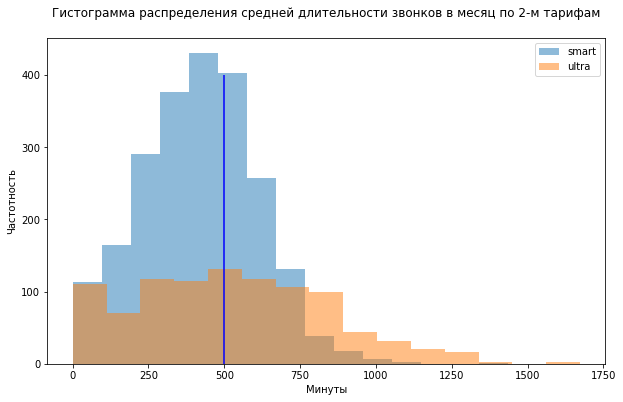

In [341]:
plt.figure(figsize=(10, 6))
result_table['total_minutes'][result_table['tariff'] == 'smart'].plot(kind='hist', alpha=0.5, bins=15)
result_table['total_minutes'][result_table['tariff'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=15)
plt.title('Гистограмма распределения средней длительности звонков в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])

#Лининии показывающие лимит по тарифу, голубая - для смарт, оражевая - для ультра.
plt.vlines(500, 0, 400, color = 'b')
#plt.vlines(3000, 0, 400, color = 'orange')


plt.show()

Вывод по графику:

    Как видно по графику, пользователи тарифа смарт часто превышают лимит включенных минут в тарифу. А пользователи тарифа ультра не выговаривают всех предоставленных минут.

In [342]:
#result_smart = result_table[result_table['tariff'] == 'smart']
#result_ultra = result_table[result_table['tariff'] == 'ultra']

In [343]:
#result_smart.head()

In [344]:
#column = 'total_minutes'
#function = 'sum'

#smart = result_smart.pivot_table(index='month', values=column, aggfunc=function).reset_index()
#ultra = result_ultra.pivot_table(index='month', values=column, aggfunc=function).reset_index()

#df = pd.DataFrame(
#    {
#        'month': smart['month'],'smart' : smart[column], 'ultra': ultra[column]
#    }
#)

#df['delta'] = df['smart'] - df['ultra']
#df

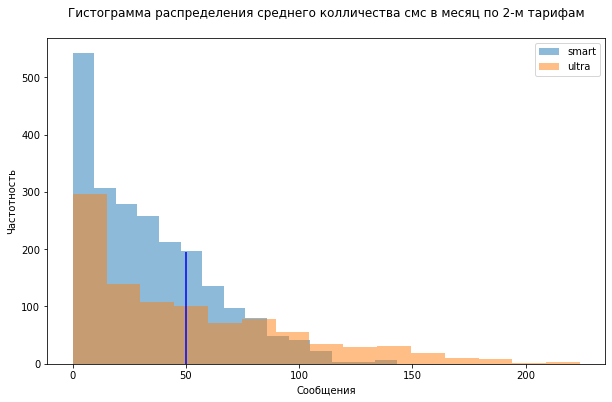

In [345]:
plt.figure(figsize=(10, 6))
result_table['number_of_sms'][result_table['tariff'] == 'smart'].plot(kind='hist', alpha=0.5, bins=15)
result_table['number_of_sms'][result_table['tariff'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=15)
plt.title('Гистограмма распределения среднего колличества смс в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Сообщения')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])

#Лининии показывающие лимит по тарифу, голубая - для смарт, оражевая - для ультра.
plt.vlines(50, 0, 195, color = 'b')
#plt.vlines(1000, 0, 400, color = 'orange')

plt.show()

Вывод по графику:

    Пользователи тарифа смарт так же превышают лимит сообщений.

In [346]:
#column = 'number_of_sms'
#function = 'sum'

#smart = result_smart.pivot_table(index='month', values=column, aggfunc=function).reset_index()
#ultra = result_ultra.pivot_table(index='month', values=column, aggfunc=function).reset_index()

#df = pd.DataFrame(
#    {
#        'month': smart['month'],'smart' : smart[column], 'ultra': ultra[column]
#    }
#)

#df['delta'] = df['smart'] - df['ultra']
#df

In [347]:
#Пользователи тарифа смарт тратят больше смс в месяц. Разница отображена в столбце дельта.

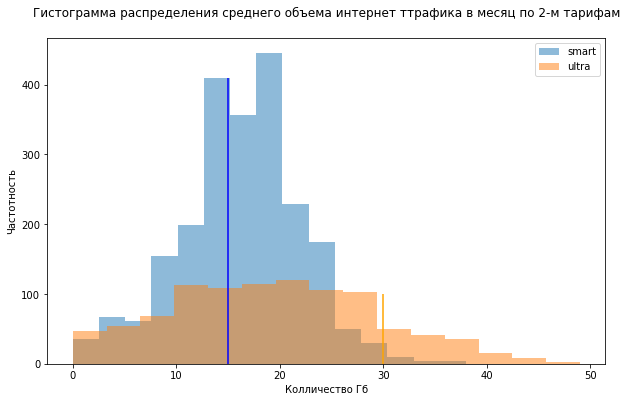

In [348]:
plt.figure(figsize=(10, 6))
result_table['gb_used'][result_table['tariff'] == 'smart'].plot(kind='hist', alpha=0.5, bins=15)
result_table['gb_used'][result_table['tariff'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=15)
plt.title('Гистограмма распределения среднего объема интернет ттрафика в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Колличество Гб')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra'])

#Лининии показывающие лимит по тарифу, голубая - для смарт, оражевая - для ультра.
plt.vlines(15, 0, 410, color = 'b')
plt.vlines(30, 0, 100, color = 'orange')

plt.show()

Вывод по графику:
    
    По графику видно, что пользователи обоих тарифов превышают лимит предоставленного графика. Но по тарифу смарт превышение в разы больше.

In [349]:
#column = 'gb_used'
#function = 'sum'

#smart = result_smart.pivot_table(index='month', values=column, aggfunc=function).reset_index()
#ultra = result_ultra.pivot_table(index='month', values=column, aggfunc=function).reset_index()

#df = pd.DataFrame(
#    {
#        'month': smart['month'],'smart' : smart[column], 'ultra': ultra[column]
#    }
#)

#df['delta'] = df['smart'] - df['ultra']
#df

In [350]:
#Пользователи тарифа смарт тратят больше Гб в месяц. Разница отображена в столбце дельта.

In [351]:
#column = 'total_minutes'
#function = 'mean'

#smart = result_smart.pivot_table(index='month', values=column, aggfunc=function).reset_index()
#ultra = result_ultra.pivot_table(index='month', values=column, aggfunc=function).reset_index()

#df = pd.DataFrame(
#    {
#        'month': smart['month'],'smart' : smart[column], 'ultra': ultra[column]
#    }
#)

#df['delta'] = df['smart'] - df['ultra']

#list_columns = ['smart', 'ultra', 'delta']

#for column in list_columns:
#    df[column] = df[column].apply(lambda x: round(x, 1))

#exemple = df
#df

In [352]:
#По данным этой таблице видно что в среднем пользователи тарифа ультра тратят больше минут.

In [353]:
#y1 = df['smart']
#y2 = df['ultra']
#colors = ['r','b']

#fig, ax1 = plt.subplots()
#ax1.hist([y1,y2],color=colors,alpha=0.8)

#ax1.set_ylabel("Count")
#plt.tight_layout()
#plt.rcParams["figure.figsize"] = (12,8)
#plt.legend()
#plt.show()

In [354]:
def deviati_on(df, column, parametr):
    #df = result_table
    tariff = 'smart'
    #column = 'total_minutes'
    #parametr = 'колличества минут'

    mean = df[df['tariff'] == tariff][column]
    #Оценка Дисперсии по выборке
    variance = np.var(mean, ddof=1)
    #Оценка стандартного отклонения по выборке
    standard_deviation = np.std(mean, ddof=1)
    mean_value = df[column][df['tariff'] == tariff].mean()
    
    print(f'Для тарифа "{tariff}" оценка дисперсии по выборке {parametr} составляет:', round(variance,2))
    print(f'Для тарифа "{tariff}" оценка стандартного отклонения по выборке {parametr} составляет:', round(standard_deviation,2))
    print(f'Для тарифа "{tariff}" среднее значение {parametr} составляет:', round(mean_value,2))
    tariff = 'ultra'

    mean = df[df['tariff'] == tariff][column]
    #Оценка Дисперсии по выборке
    variance = np.var(mean, ddof=1)
    #Оценка стандартного отклонения по выборке
    standard_deviation = np.std(mean, ddof=1)
    mean_value = df[column][df['tariff'] == tariff].mean()
    
    print('')
    print(f'Для тарифа "{tariff}" оценка дисперсии по выборке {parametr} составляет:', round(variance,2))
    print(f'Для тарифа "{tariff}" оценка стандартного отклонения по выборке {parametr} составляет:', round(standard_deviation,2))
    print(f'Для тарифа "{tariff}" среднее значение {parametr} составляет:', round(mean_value,2))

In [355]:
result_table.head()

,index,user_id,city,tariff,month,gb_used,number_of_sms,number_of_calls,total_minutes,extra_gb,extra_sms,extra_minutes,extra_gb_rub,extra_sms_rub,extra_minutes_rub,monthly_fee_rub,total_rub
0,0,1000,Краснодар,ultra,2018-05-01,3,22,22,159,0,0,0,0,0,0,1950,1950
1,1,1000,Краснодар,ultra,2018-06-01,23,60,43,172,0,0,0,0,0,0,1950,1950
2,2,1000,Краснодар,ultra,2018-07-01,14,75,47,340,0,0,0,0,0,0,1950,1950
3,3,1000,Краснодар,ultra,2018-08-01,14,81,52,408,0,0,0,0,0,0,1950,1950
4,4,1000,Краснодар,ultra,2018-09-01,15,57,58,466,0,0,0,0,0,0,1950,1950


In [356]:
deviati_on(df=result_table, column='total_minutes', parametr='колличества минут')

Для тарифа "smart" оценка дисперсии по выборке колличества минут составляет: 36281.39
Для тарифа "smart" оценка стандартного отклонения по выборке колличества минут составляет: 190.48
Для тарифа "smart" среднее значение колличества минут составляет: 417.75

Для тарифа "ultra" оценка дисперсии по выборке колличества минут составляет: 101052.49
Для тарифа "ultra" оценка стандартного отклонения по выборке колличества минут составляет: 317.89
Для тарифа "ultra" среднее значение колличества минут составляет: 526.09


Вывод:
    
    Для тарифа смарт среднее значение колличества минут укладывается в значение лимита по тарифу - 500мин. Но Стандартное отклонение показывает , что превышение лимита имеет место. Эти результаты можно наблюдать на выше приведенных графиках.
    Для тарифа ультра среднее значение колличества минут не превышает значения лимита - 3000мин. Так же не превышает лимит и суммарное значение среднего и стандартного отклонения, тем самым мы видим, что пользователи не выговаривают всех предоставленных минут. Этот результат мы получили на графике.

In [357]:
deviati_on(df=result_table, column='number_of_sms', parametr='колличества смс')

Для тарифа "smart" оценка дисперсии по выборке колличества смс составляет: 796.96
Для тарифа "smart" оценка стандартного отклонения по выборке колличества смс составляет: 28.23
Для тарифа "smart" среднее значение колличества смс составляет: 33.37

Для тарифа "ultra" оценка дисперсии по выборке колличества смс составляет: 2285.42
Для тарифа "ultra" оценка стандартного отклонения по выборке колличества смс составляет: 47.81
Для тарифа "ultra" среднее значение колличества смс составляет: 49.31


Вывод:

    Для тарифа смарт среднее значение колличества сообщений укладывается в значение лимита по тарифу - 50шт. Но Стандартное отклонение показывает , что превышение лимита имеет место. Эти результаты можно наблюдать на выше приведенных графиках.
    Для тарифа ультра среднее значение колличества сообщений не превышает значения лимита - 1000шт. Так же не превышает лимит и суммарное значение среднего и стандартного отклонения, тем самым мы видим, что пользователи не используют всех предоставленных сообщений. Этот результат мы получили на графике.

In [358]:
deviati_on(df=result_table, column='gb_used', parametr='колличества Гб')

Для тарифа "smart" оценка дисперсии по выборке колличества Гб составляет: 33.13
Для тарифа "smart" оценка стандартного отклонения по выборке колличества Гб составляет: 5.76
Для тарифа "smart" среднее значение колличества Гб составляет: 16.32

Для тарифа "ultra" оценка дисперсии по выборке колличества Гб составляет: 97.38
Для тарифа "ultra" оценка стандартного отклонения по выборке колличества Гб составляет: 9.87
Для тарифа "ultra" среднее значение колличества Гб составляет: 19.47


Вывод:

    Для тарифа смарт среднее значение колличества интернет трафика не укладывается в значение лимита по тарифу - Гб. Пользователи тратят больше чем включено в пакет услуг. Эти результаты можно наблюдать на выше приведенных графиках.
    Для тарифа ультра среднее значение колличества интернет трафика не превышает значения лимита - 30Гб. Превышает лимит суммарное значение среднего и стандартного отклонения, тем самым мы видим, что не все пользователи превышают лимит, а лишь какая-то чвсть. Этот результат мы получили на графике.

In [359]:
#column = 'number_of_sms'
#function = 'mean'

#smart = result_smart.pivot_table(index='month', values=column, aggfunc=function).reset_index()
#ultra = result_ultra.pivot_table(index='month', values=column, aggfunc=function).reset_index()

#df = pd.DataFrame(
#    {
#        'month': smart['month'],'smart' : smart[column], 'ultra': ultra[column]
#    }
#)

#df['delta'] = df['smart'] - df['ultra']

#list_columns = ['smart', 'ultra', 'delta']

#for column in list_columns:
#    df[column] = df[column].apply(lambda x: round(x, 1))
#df

In [360]:
#По данным этой таблице видно что в среднем пользователи тарифа удбтра тратят юольше смс.

In [361]:
#y1 = df['smart']
#y2 = df['ultra']
#colors = ['r','b']

#fig, ax1 = plt.subplots()
#ax1.hist([y1,y2],color=colors,alpha=0.8)

#ax1.set_ylabel("Count")
#plt.tight_layout()
#plt.rcParams["figure.figsize"] = (12,8)
#plt.legend()
#plt.show()

In [362]:
#df = result_table
#tariff = 'smart'
#column = 'number_of_sms'

#mean = df[df['tariff'] == tariff][column]
#Оценка Дисперсии по выборке
#variance = np.var(mean, ddof=1)
#Оценка стандартного отклонения по выборке
#standard_deviation = np.std(mean, ddof=1)

#print(f'Для тарифа "{tariff}" оценка дисперсии по выборке составляет:', round(variance,2))
#print(f'Для тарифа "{tariff}" оценка стандартного отклонения по выборке составляет:', round(standard_deviation,2))

#tariff = 'ultra'

#mean = df[df['tariff'] == tariff][column]
#Оценка Дисперсии по выборке
#variance = np.var(mean, ddof=1)
#Оценка стандартного отклонения по выборке
#standard_deviation = np.std(mean, ddof=1)

#print('')
#print(f'Для тарифа "{tariff}" оценка дисперсии по выборке составляет:', round(variance,2))
#print(f'Для тарифа "{tariff}" оценка стандартного отклонения по выборке составляет:', round(standard_deviation,2))

In [363]:
#column = 'gb_used'
#function = 'mean'

#smart = result_smart.pivot_table(index='month', values=column, aggfunc=function).reset_index()
#ultra = result_ultra.pivot_table(index='month', values=column, aggfunc=function).reset_index()

#df = pd.DataFrame(
#    {
#        'month': smart['month'],'smart' : smart[column], 'ultra': ultra[column]
#    }
#)

#df['delta'] = df['smart'] - df['ultra']

#list_columns = ['smart', 'ultra', 'delta']

#for column in list_columns:
#    df[column] = df[column].apply(lambda x: round(x, 1))
#df

In [364]:
#По данным этой тадице видно что пользователи тарифа ультра тратят в среднем больше смс.

In [365]:
#y1 = df['smart']
#y2 = df['ultra']
#colors = ['r','b']

#fig, ax1 = plt.subplots()
#ax1.hist([y1,y2],color=colors,alpha=0.8)

#ax1.set_ylabel("Count")
#plt.tight_layout()
#plt.rcParams["figure.figsize"] = (12,8)
#plt.legend()
#plt.show()

In [366]:
#df = result_table
#tariff = 'smart'
#column = 'gb_used'

#mean = df[df['tariff'] == tariff][column]
#Оценка Дисперсии по выборке
#variance = np.var(mean, ddof=1)
#Оценка стандартного отклонения по выборке
#standard_deviation = np.std(mean, ddof=1)

#print(f'Для тарифа "{tariff}" оценка дисперсии по выборке составляет:', round(variance,2))
#print(f'Для тарифа "{tariff}" оценка стандартного отклонения по выборке составляет:', round(standard_deviation,2))

#tariff = 'ultra'

#mean = df[df['tariff'] == tariff][column]
#Оценка Дисперсии по выборке
#variance = np.var(mean, ddof=1)
#Оценка стандартного отклонения по выборке
#standard_deviation = np.std(mean, ddof=1)

#print('')
#print(f'Для тарифа "{tariff}" оценка дисперсии по выборке составляет:', round(variance,2))
#print(f'Для тарифа "{tariff}" оценка стандартного отклонения по выборке составляет:', round(standard_deviation,2))

In [367]:
#funct = ['sum', 'mean']

#table_minutes = result_table.pivot_table(index=['tariff', 'month'], values='total_minutes', aggfunc=funct).reset_index()
#table_sms = result_table.pivot_table(index=['tariff', 'month'], values='number_of_sms', aggfunc=funct).reset_index()
#table_gb = result_table.pivot_table(index=['tariff', 'month'], values='gb_used', aggfunc=funct).reset_index()

#table_minutes.head()
#table_gb.head()
#table_sms.head()

In [368]:
#Кол-во смс. Построим распределение среднего кол-ва смс в месяц.

In [369]:
#df = table_sms
#column_name_1 = 'tariff'
#column_name_2 = 'month'
#column_name_3 = ('sum', 'number_of_sms')
#column_name_4 = ('mean', 'number_of_sms')
#d = {column_name_1:df[column_name_1], column_name_2:df[column_name_2], 
#     'sum_sms':df[column_name_3], 'mean_sms':df[column_name_4]}
#sms_temp = pd.DataFrame(d)
#sms_temp['mean_sms'] = sms_temp['mean_sms'].apply(lambda x: round(x, 1))
#sms_temp.head()

In [370]:
#df = sms_temp
#column = 'mean_sms'

#y1 = df[df['tariff'] == 'ultra'][column]
#y2 = df[df['tariff'] == 'smart'][column]
#colors = ['r','b']

#fig, ax1 = plt.subplots()
#ax1.hist([y1,y2],color=colors,alpha=0.8)

#ax1.set_ylabel("Count")
#plt.tight_layout()
#plt.rcParams["figure.figsize"] = (10,8)
#plt.legend()
#plt.show()

#Найдем дисперсию и стандартное отклонение тарифа для кол-ва минут разговоров.

In [371]:
#sms_temp.head()

Т.к. мы работаем с выборкой по клиентам а не с полным набором данных, то будем находить оценку дисперсии и оценку стандартного отклонения для всех последующих расчетов.

In [372]:
#df = sms_temp
#tariff = 'smart'
#column = 'mean_sms'

#mean = df[df['tariff'] == tariff][column]

#Оценка Дисперсии по выборке
#variance = np.var(mean, ddof=1)

#Оценка стандартного отклонения по выборке
#standard_deviation = np.std(mean, ddof=1)

#print(f'Для тарифа "{tariff}" оценка дисперсии по выборке составляет:', round(variance,2))
#print(f'Для тарифа "{tariff}" оценка стандартного отклонения по выборке составляет:', round(standard_deviation,2))

In [373]:
#df = sms_temp
#tariff = 'ultra'
#column = 'mean_sms'

#mean = df[df['tariff'] == tariff][column]

#Оценка Дисперсии по выборке
#variance = np.var(mean, ddof=1)

#Оценка стандартного отклонения по выборке
#standard_deviation = np.std(mean, ddof=1)

#print(f'Для тарифа "{tariff}" оценка дисперсии по выборке составляет:', round(variance,2))
#print(f'Для тарифа "{tariff}" оценка стандартного отклонения по выборке составляет:', round(standard_deviation,2))

Интернет трафик. Построим распределение среднего кол-ва Гб в месяц.

In [374]:
#df = table_gb
#column_name_1 = 'tariff'
#column_name_2 = 'month'
#column_name_3 = ('sum', 'gb_used')
#column_name_4 = ('mean', 'gb_used')
#d = {column_name_1:df[column_name_1], column_name_2:df[column_name_2], 
#     'sum_gb':df[column_name_3], 'mean_gb':df[column_name_4]}
#gb_temp = pd.DataFrame(d)
#gb_temp['mean_gb'] = gb_temp['mean_gb'].apply(lambda x: round(x, 1))
#gb_temp.head()

In [375]:
#df = gb_temp
#column = 'mean_gb'

#y1 = df[df['tariff'] == 'ultra'][column]
#y2 = df[df['tariff'] == 'smart'][column]
#colors = ['r','b']

#fig, ax1 = plt.subplots()
#ax1.hist([y1,y2],color=colors,alpha=0.8)
#ax1.set_xlim(-10,10)
#ax1.set_ylabel("Count")
#plt.tight_layout()
#plt.rcParams["figure.figsize"] = (10,8)
#plt.legend()
#plt.show()

Найдем дисперсию и стандартное отклонение тарифа для кол-ва минут разговоров.

In [376]:
#gb_temp.head()

In [377]:
#df = gb_temp
#tariff = 'smart'
#column = 'mean_gb'

#mean = df[df['tariff'] == tariff][column]

#Оценка Дисперсии по выборке
#variance = np.var(mean, ddof=1)

#Оценка стандартного отклонения по выборке
#standard_deviation = np.std(mean, ddof=1)

#print(f'Для тарифа "{tariff}" оценка дисперсии по выборке составляет:', round(variance,2))
#print(f'Для тарифа "{tariff}" оценка стандартного отклонения по выборке составляет:', round(standard_deviation,2))

In [378]:
#df = gb_temp
#tariff = 'ultra'
#column = 'mean_gb'

#mean = df[df['tariff'] == tariff][column]

#Оценка Дисперсии по выборке
#variance = np.var(mean, ddof=1)

#Оценка стандартного отклонения по выборке
#standard_deviation = np.std(mean, ddof=1)

#print(f'Для тарифа "{tariff}" оценка дисперсии по выборке составляет:', round(variance,2))
#print(f'Для тарифа "{tariff}" оценка стандартного отклонения по выборке составляет:', round(standard_deviation,2))

Кол-во минут. Построим распределение среднего кол-ва минут в месяц.

In [379]:
#df = table_minutes
#column_name_1 = 'tariff'
#column_name_2 = 'month'
#column_name_3 = ('sum', 'total_minutes')
#column_name_4 = ('mean', 'total_minutes')
#d = {column_name_1:df[column_name_1], column_name_2:df[column_name_2], 
#     'sum_minutes':df[column_name_3], 'mean_minutes':df[column_name_4]}
#minutes_temp = pd.DataFrame(d)
#minutes_temp['mean_minutes'] = minutes_temp['mean_minutes'].apply(lambda x: round(x, 1))
#minutes_temp.head()

In [380]:
#df = minutes_temp
#column = 'mean_minutes'

#y1 = df[df['tariff'] == 'ultra'][column]
#y2 = df[df['tariff'] == 'smart'][column]
#colors = ['r','b']

#fig, ax1 = plt.subplots()
#ax1.hist([y1,y2],color=colors,alpha=0.8)
#ax1.set_xlim(-10,10)
#ax1.set_ylabel("Count")
#plt.tight_layout()
#plt.rcParams["figure.figsize"] = (10,8)
#plt.legend()
#plt.show()

Найдем дисперсию и стандартное отклонение тарифа для кол-ва минут разговоров.

In [381]:
#minutes_temp.head()

In [382]:
#df = minutes_temp
#tariff = 'smart'
#column = 'mean_minutes'

#mean = df[df['tariff'] == tariff][column]

#Оценка Дисперсии по выборке
#variance = np.var(mean, ddof=1)

#Оценка стандартного отклонения по выборке
#standard_deviation = np.std(mean, ddof=1)

#print(f'Для тарифа "{tariff}" оценка дисперсии по выборке составляет:', round(variance,2))
#print(f'Для тарифа "{tariff}" оценка стандартного отклонения по выборке составляет:', round(standard_deviation,2))

In [383]:
#df = minutes_temp
#tariff = 'ultra'
#column = 'mean_minutes'

#mean = df[df['tariff'] == tariff][column]

#Оценка Дисперсии по выборке
#variance = np.var(mean, ddof=1)

#Оценка стандартного отклонения по выборке
#standard_deviation = np.std(mean, ddof=1)

#print(f'Для тарифа "{tariff}" оценка дисперсии по выборке составляет:', round(variance,2))
#print(f'Для тарифа "{tariff}" оценка стандартного отклонения по выборке составляет:', round(standard_deviation,2))

<div class="alert alert-info">
    
## По полученным графикам можно сделать следующие выводы:
По этим графикам - гистограммам невозможно сделать никаких выводов.
</div>

## Шаг 4. Проверьте гипотезы
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Соберем дата сет, который будет содержать информацию по среднней выручке в зависимости от тарифа.

In [384]:
#result_table.head()

In [385]:
#funct = ['sum', 'mean']

#table_payment = result_table.pivot_table(index=['tariff', 'month'], values='payment', aggfunc=funct).reset_index()
#table_payment.head()

In [386]:
#df = table_payment
#column_name_1 = 'tariff'
#column_name_2 = 'month'
#column_name_3 = ('sum', 'payment')
#column_name_4 = ('mean', 'payment')
#d = {column_name_1:df[column_name_1], column_name_2:df[column_name_2], 
#     'sum_payment':df[column_name_3], 'mean_payment':df[column_name_4]}
#payment_temp = pd.DataFrame(d)
#payment_temp['mean_payment'] = payment_temp['mean_payment'].apply(lambda x: round(x, 1))
#payment_temp.head()

In [387]:
#df = payment_temp
#df = df[['tariff', 'month', 'mean_payment']]
#order = df['month'].unique()
#df_wide = df.pivot_table(index='month', columns='tariff', values='mean_payment')
#df_wide = df_wide.reindex(order, axis=0)

#print(df_wide)

In [388]:
#sns.lineplot(data=df_wide)
#plt.xlabel("Месяц")
#plt.ylabel("Значение средней выручки, Руб.")
#plt.show()

<div class="alert alert-info">

## По полученным графикам можно сделать следующие выводы:
- средняя выручка по тарифу Ультра больше чем по тарифу Смарт на протяжениии года.
<div>

Далее приведу метод решения по теории согласно выдвинутым гипотезам и статистическим методам питона.

Почему гтпотезы - двух сторонние. Потому,что нам важно выяснить - ровна ли выручка или нет. 

Для решения нам понадобятся две выборки с данными с выручкой по месяцам(средняя выручка за месяц, так мы добъемся того, что размеры выборок будут одинаковы и равны 12 элементам в каждой).

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var). 

- array1, array2 — массивы, содержащие выборки;

- equal_var (от англ. equal variance — «равная дисперсия») — необязательный параметр, задающий, считать ли равными дисперсии выборок. Передаётся как equal_var = True или equal_var = False (True — считать, False — не считать).

Рассмотрим три аспекта, которые надо проверить, чтобы понять, можно ли применять t-тест:

1. Генеральные совокупности не должны зависеть друг от друга.
    Если вы рассматриваете одну генеральную совокупность до и после какого-то изменения, нужно использовать другой тест.
2. Выборочные средние должны быть нормально распределены.
    А если выборка всего одна, то её среднее должно иметь нормальное распределение для разных выборок этого размера из определённой генеральной совокупности.
3. Дисперсии рассматриваемых генеральных совокупностей должны быть равны.

Применим выше описанный метод для дата сета df_wide в котором собраны данные средней выручки в месяц для двух тарифов. Для работы загрузим необходимые библиотеки.

Что касается параметра equal_var, мне кажется его необходимо активировать, другими словами я делаю предположение о том, что разброс для разных групп будет разный. Под группой я подразумеваю - потребителей разных тарифов, те кто готов платить больше и те кто готов мирится с ограниченностью доступных "ресурсов" - минут, сообщений и Гб.(я рассмотрел оба расчета и с активным equal_var и нет, на конечный результат в данной задаче это не повлияло.)

### Видвинем двух стороннюю нулевую гипотезу Н0:
    - средняя выручка пользователей тарифа «Ультра» равна средней выручка пользователей тарифа «Смарт». 
### Не нулевая двух сторонняя гипотеза Н1:
    - средние выручки пользователей тарифов «Ультра» и «Смарт» различаются.

In [389]:
result_table.head()

,index,user_id,city,tariff,month,gb_used,number_of_sms,number_of_calls,total_minutes,extra_gb,extra_sms,extra_minutes,extra_gb_rub,extra_sms_rub,extra_minutes_rub,monthly_fee_rub,total_rub
0,0,1000,Краснодар,ultra,2018-05-01,3,22,22,159,0,0,0,0,0,0,1950,1950
1,1,1000,Краснодар,ultra,2018-06-01,23,60,43,172,0,0,0,0,0,0,1950,1950
2,2,1000,Краснодар,ultra,2018-07-01,14,75,47,340,0,0,0,0,0,0,1950,1950
3,3,1000,Краснодар,ultra,2018-08-01,14,81,52,408,0,0,0,0,0,0,1950,1950
4,4,1000,Краснодар,ultra,2018-09-01,15,57,58,466,0,0,0,0,0,0,1950,1950


In [390]:
alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвегнем гипотезу

array_1 = result_table['total_rub'][result_table['tariff'] == 'smart']
array_2 = result_table['total_rub'][result_table['tariff'] == 'ultra']

results = st.ttest_ind(array_1, array_2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


### Полученный результат говорит о том, что - средняя выручка пользователей тарифов «Ультра» и «Смарт» имеет статистически значимые различия.


# Определим средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов или нет.

Теперь выдвинем двухстороннюю гипотезу и проверим ее. Нулевая гипотеза Н0 будет звучать так - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Гипотеза получается двух сторонняя, т.к. нам важен только факт того , что выручка отличается, а в какую сторону, не важно. Альтернативная гипотеза Н1 будет звучать так - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

### Видвинем двух стороннюю нулевую гипотезу Н0:
    - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.
### Не нулевая двух сторонняя гипотеза Н1:
    - средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

In [391]:
#funct = ['sum', 'mean']

#table_payment_city = result_table.pivot_table(index=['city', 'month'], values='payment', aggfunc=funct).reset_index()
#table_payment_city.head()

In [392]:
#df = table_payment_city
#column_name_1 = 'city'
#column_name_2 = 'month'
#column_name_3 = ('sum', 'payment')
#column_name_4 = ('mean', 'payment')
#d = {column_name_1:df[column_name_1], column_name_2:df[column_name_2], 
#     'sum_payment':df[column_name_3], 'mean_payment':df[column_name_4]}
#payment_temp = pd.DataFrame(d)
#payment_temp['mean_payment'] = payment_temp['mean_payment'].apply(lambda x: round(x, 1))
#table_moscow = payment_temp[payment_temp['city'] == 'Москва']
#table_region = payment_temp[payment_temp['city'] != 'Москва']

#table_moscow.head()
#table_region.head()

In [393]:
#table_moscow.head()

In [394]:
alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвегнем гипотезу

array_1 = result_table['total_rub'][result_table['city'] == 'Москва']
array_2 = result_table['total_rub'][result_table['city'] != 'Москва']

results = st.ttest_ind(array_1, array_2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5216952110000278
Не получилось отвергнуть нулевую гипотезу


### Полученный результат говорит о том, что - средняя выручка по Москве имеет статистически значимые различия от выручки по другим регионам.


<div class="alert alert-info">

## Общий вывод:
В ходе данной работы были проделаны следующие шаги:
- были определены количественные характеристики пользователей согласно их тратам по обоим тарифам;
- посчитанная месячная выручка с каждого пользователя;
- были выдвинуты две двухсторонние гипотезы и приведены расчеты для подтверждения или опровержения этих гипотез.
    
Количественный анализ трат пользователей показал, что пользователи тарифа Ультра тратят больше минут, смс и Гб. Что в свою очередь ведет к тому, что тариф Ультра является более прибыльным для компании. Это же подтверждает анализ месячной выручки. Выдвинутая гипотеза, в свою очередь так же подтверждает, что, тариф Ультра является более прибыльным по месячной выручке. Выдвинутая гипотеза о том, что месячная выручка в Москве ровна выручке в остальных регионах не подтвердилась расчетами и статистическим методом. Обе выдвинутые гипотезы были двух сторонними, что означает, что мы рассматриваем только верно ли предположение или нет, а в какую сторону если нет нам не важно в контексте данной задачи.  Уровень значимости был выбран равным 5%. Уровень значимости численно определяет, где проходит граница вероятности попасть слишком далеко от центра распределения. 

В качестве перспективного тарифа, можно выделить тариф ультра. По минутам и сообщениям, пользователи не приближаются к пределам. В полне возможно уменьшить пределы и тем самым заставить пользователей превышать лимиты.     
<div>